# 第三章习题3  Titanic 数据集上的分类

##  Prepare the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
#train = pd.read_csv("../input/titanic/train.csv")
train = pd.read_csv("datasets/titanic/train.csv")

*Take a glasp of dataset*

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
data_val = pd.read_csv('datasets/titanic/test.csv')

In [117]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [118]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*Check if there are repeated names*

In [4]:
name_count = train["Name"].value_counts().values

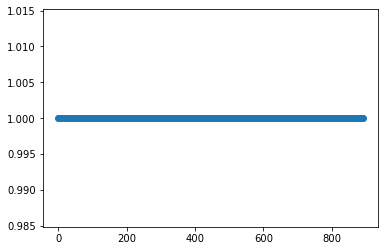

In [7]:
plt.scatter(range(len(name_count)), name_count)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [101]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S


In [30]:
#train.isna().any()

In [103]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train.columns[train.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [22]:
train.columns[train.notna().any()]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [32]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

*Show digital data in figures*

In [154]:
train_label = train["Survived"]
y_train = train_label.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faafbc4f198>,
      dtype=object)

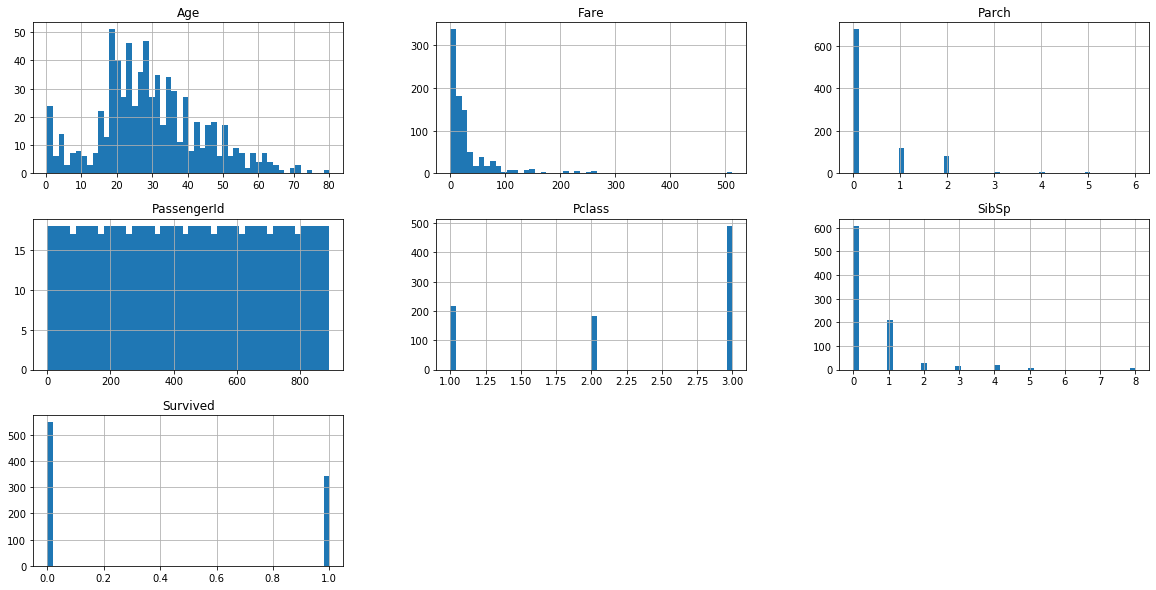

In [155]:
train.hist(bins=50,figsize=(20,10))

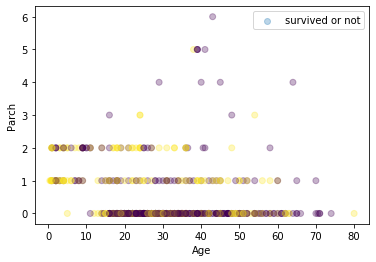

In [156]:
plt.scatter(train["Age"], train["Parch"], c=train_label, alpha=0.3,label='survived or not')
plt.xlabel("Age")
plt.ylabel("Parch")
plt.legend()

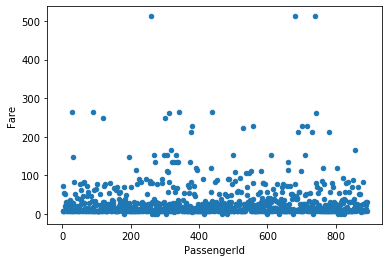

In [157]:
train.plot(kind='scatter',x='PassengerId',y='Fare')

*Clean the data*

In [158]:
train_feat = train.drop("Survived", axis=1)
#train_feat.info()

In [159]:
data_cleaner = [train_feat, data_val]

In [160]:
for data in data_cleaner:
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [161]:
exclude_index = ['PassengerId', 'Ticket', 'Cabin']
train_feat.drop(exclude_index, axis=1, inplace=True)

In [162]:
train_feat.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [163]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [191]:
train_feat['Name'].sample(10)

310                     Hays, Miss. Margaret Bechstein
67                            Crease, Mr. Ernest James
802                Carter, Master. William Thornton II
186    O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)
5                                     Moran, Mr. James
859                                   Razi, Mr. Raihed
390                         Carter, Mr. William Ernest
647                Simonius-Blumer, Col. Oberst Alfons
261                  Asplund, Master. Edvin Rojj Felix
446                  Mellinger, Miss. Madeleine Violet
Name: Name, dtype: object

In [236]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Alone'] = 1
    dataset['Alone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    #dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [193]:
train_feat[['Alone', 'FamilySize', 'SibSp', 'Parch', 'Title']].sample(10)

,Alone,FamilySize,SibSp,Parch,Title
705,1,1,0,0,Mr
783,0,4,1,2,Mr
197,0,2,0,1,Mr
27,0,6,3,2,Mr
628,1,1,0,0,Mr
731,1,1,0,0,Mr
561,1,1,0,0,Mr
187,1,1,0,0,Mr
457,0,2,1,0,Mrs
545,1,1,0,0,Mr


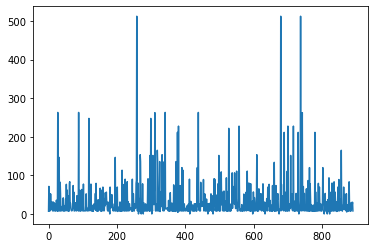

In [198]:
train_feat['Fare'].plot()

In [237]:
title_name = train_feat['Title'].value_counts() < 10
#title_name['Mr']
title_name

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Mlle             True
Major            True
Sir              True
Ms               True
Don              True
Lady             True
Capt             True
Mme              True
the Countess     True
Jonkheer         True
Name: Title, dtype: bool

In [238]:
train_feat['Title'] = train_feat['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [240]:
train_feat['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [244]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [245]:
train_feat.isna().sum()

Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
Alone            0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [246]:
data_val.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
Alone              0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64

In [264]:
train[['Survived', 'Sex']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [267]:
train[['Survived', 'Embarked']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


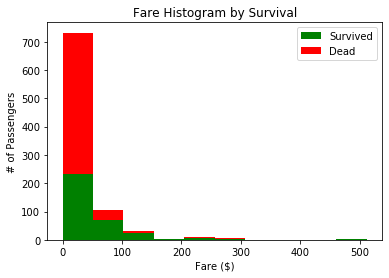

In [256]:
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

## Appendix

*change ND to 1D*

In [45]:
#a = move_image_one_pixel(X_train[0],'up').reshape(28,28)
a = np.random.rand(3,4,5,2)
b = a.ravel()#view of a, not copy
print(b.shape, a.ravel().shape)
c = a.reshape(-1)
d = a.flatten()
print(c.shape, d.shape, a.shape)
np.prod(a.shape)

(120,) (120,)
(120,) (120,) (3, 4, 5, 2)


120

*Extend array*

In [72]:
a = np.arange(6).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [78]:
b = np.append(a, np.arange(6).reshape(2, 3), axis=0)
b

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [81]:
np.concatenate((a, a, b), axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])